In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
from keys import keys
from binance.client import Client

In [4]:
client = Client(api_key=keys.apiKey, api_secret=keys.secretKey)

In [5]:
"""
The various columns used by Binance
taken from:
https://python-binance.readthedocs.io/en/latest/binance.html#module-binance.client
"""

columns = ['Open Time', 'Open', 'High', 'Low', 'Close',
            'Volume', 'Close Time', 'Quote asset volume', 
            'n_trades', 'Taker buy base asset volume', 
            'Taker buy quote asset volume', 'Ignore']

In [6]:
"""
DOWNLOADS DATA FROM BINANCE IN BATCHES OF 500 items
in total will return 500*n_rows - (n_rows+1) and
no duplicate data should be present

INPUTS:
    n_iterations: how many batches of 500 items to download
    
    currency: one of the varios currencies, examples: 
                'BTCUSDT', 'LTCUSDT' ...etc
    interval:   Client.KLINE_INTERVAL_1MINUTE
                Client.KLINE_INTERVAL_3MINUTE
                Client.KLINE_INTERVAL_5MINUTE
                Client.KLINE_INTERVAL_15MINUTE
                Client.KLINE_INTERVAL_30MINUTE
                Client.KLINE_INTERVAL_1HOUR
                ...
"""
def get_data_by_intervals(n_iterations, currencies, interval):
    
    #columns template
    columns = ['Open Time', 'Open', 'High', 'Low', 'Close',
            'Volume', 'Close Time', 'Quote asset volume', 
            'n_trades', 'Taker buy base asset volume', 
            'Taker buy quote asset volume', 'Ignore']
    
    #most recent timestamp to start downloading from
    starting_point = client.get_klines(symbol=currencies[0], 
                                  interval=interval, limit=1)[-1][0]
    
    main_df = pd.DataFrame()
    
    for currency in currencies:
        currency_cols = []
        for col in columns:
            currency_cols.append(currency+' '+col)
        specific_currency_df = pd.DataFrame(columns=currency_cols)
        
        #downloading n iterations of a specific currency
        for i in range(0,n_iterations):
            #split in if elseto use starting_point
            if specific_currency_df.empty:
                new_data = client.get_klines(symbol=currency, 
                                              interval=interval,
                                              endTime = starting_point,
                                              limit=500
                                            )
            else:
                end_time = specific_currency_df[currency+' Open Time'].iloc[0]
                new_data = client.get_klines(symbol=currency, 
                                              interval=interval,
                                              endTime=end_time,
                                              limit=500
                                            )
            #merging all the rows of a specific currency in one DataFrame
            #we need to delete the first row of specific_currency_df or
            # delete the last row of new_data_df, it's repeated
            new_data_df = pd.DataFrame(new_data, columns=currency_cols)
            specific_currency_df = pd.concat([new_data_df,specific_currency_df[1:]],
                                             ignore_index=True)
            
        #merging the specific currency created into the main_df were we keep all the data
        main_df = pd.concat([main_df, specific_currency_df],axis=1)
    return main_df

In [7]:
coin_list = ['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'LTCUSDT', 'XRPUSDT']

In [8]:
coins = get_data_by_intervals(1, coin_list, Client.KLINE_INTERVAL_15MINUTE)
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   BTCUSDT Open Time                     500 non-null    object
 1   BTCUSDT Open                          500 non-null    object
 2   BTCUSDT High                          500 non-null    object
 3   BTCUSDT Low                           500 non-null    object
 4   BTCUSDT Close                         500 non-null    object
 5   BTCUSDT Volume                        500 non-null    object
 6   BTCUSDT Close Time                    500 non-null    object
 7   BTCUSDT Quote asset volume            500 non-null    object
 8   BTCUSDT n_trades                      500 non-null    object
 9   BTCUSDT Taker buy base asset volume   500 non-null    object
 10  BTCUSDT Taker buy quote asset volume  500 non-null    object
 11  BTCUSDT Ignore                  

In [9]:
coins.head()

,BTCUSDT Open Time,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Close Time,BTCUSDT Quote asset volume,BTCUSDT n_trades,BTCUSDT Taker buy base asset volume,...,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Close Time,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume,XRPUSDT Ignore
0,1582650900000,9331.76000000,9349.59000000,9305.00000000,9339.21000000,850.68538700,1582651799999,7935212.32160702,7661,378.20985900,...,0.25472000,0.25317000,0.25416000,2582458.60000000,1582651799999,655949.11557500,1430,1227817.90000000,311883.14674200,0
1,1582651800000,9339.20000000,9392.06000000,9331.29000000,9372.65000000,674.15387100,1582652699999,6308107.25246233,7087,334.35475700,...,0.25586000,0.25405000,0.25510000,3374949.80000000,1582652699999,860244.23571500,1709,1944216.60000000,495518.35579300,0
2,1582652700000,9372.76000000,9374.96000000,9335.00000000,9335.24000000,622.45661900,1582653599999,5820694.98198025,5679,255.61382400,...,0.25528000,0.25390000,0.25400000,1502698.30000000,1582653599999,382313.76830900,901,672947.20000000,171214.82959100,0
3,1582653600000,9335.21000000,9368.92000000,9322.47000000,9368.40000000,621.06272400,1582654499999,5806196.93899016,5647,297.83619100,...,0.25540000,0.25360000,0.25531000,1390103.10000000,1582654499999,353784.24953400,921,943308.80000000,240034.56379700,0
4,1582654500000,9368.40000000,9375.33000000,9339.75000000,9361.88000000,606.76436300,1582655399999,5676128.53096742,5945,336.64103200,...,0.25579000,0.25445000,0.25557000,1486367.00000000,1582655399999,379158.28983800,982,606549.30000000,154706.42501800,0


In [10]:
"""
USED TO CHECK IF THERE ARE ANY SUDDEN JUMPS IN THE TIMESTAMPS
"""

def test_time_skip(df, currencies):
    diff = 0
    df_len = len(df)
    for i in range(0,df_len-1):
        for currency in currencies:
            if i == 0:
                #get first time difference to compare with the rest
                diff = df[currency+' Open Time'].iloc[i+1] - df[currency+' Open Time'].iloc[i]
            if (df[currency+' Open Time'].iloc[i+1] - df[
                    currency+' Open Time'].iloc[i] != diff):
                print('Time difference: ',(df[currency+' Open Time'
                                  ].iloc[i+1] - df[currency+' Open Time'].iloc[i]), currency)
                print('time 1: ',df[currency+' Open Time'].iloc[i+1],i+1)
                print('time 2: ',df[currency+' Open Time'].iloc[i],i)


In [11]:
test_time_skip(coins,coin_list)

There might some time jumps due to server downtime of binance upgrades etc..
if we search for 9/2/2020 on google binance we can see there was a maintenance

In [12]:
"""
remove ignore column and repeated timestamp columns
"""
def clean_data(df, currencies):
    coins['Timestamp'] = df[currencies[0]+' Close Time']
    for currency in currencies:
        df.drop(currency+' Ignore', axis=1, inplace=True)
        df.drop([currency+' Open Time',
                 currency+' Close Time'],
                 axis=1, inplace=True)


In [13]:
clean_data(coins, coin_list)

In [14]:
coins['Timestamp'] = coins['Timestamp'].apply(
    lambda x: datetime.fromtimestamp(int(x/1000)))

In [15]:
print('Data timeframe:')
print( 'From:  ',coins['Timestamp'].max())
print( 'To     ',coins['Timestamp'].min())

Data timeframe:
From:   2020-03-01 23:14:59
To      2020-02-25 18:29:59


In [16]:
for i in coins.columns:
    if i != 'Timestamp':
        coins[i] = coins[i].astype(float)

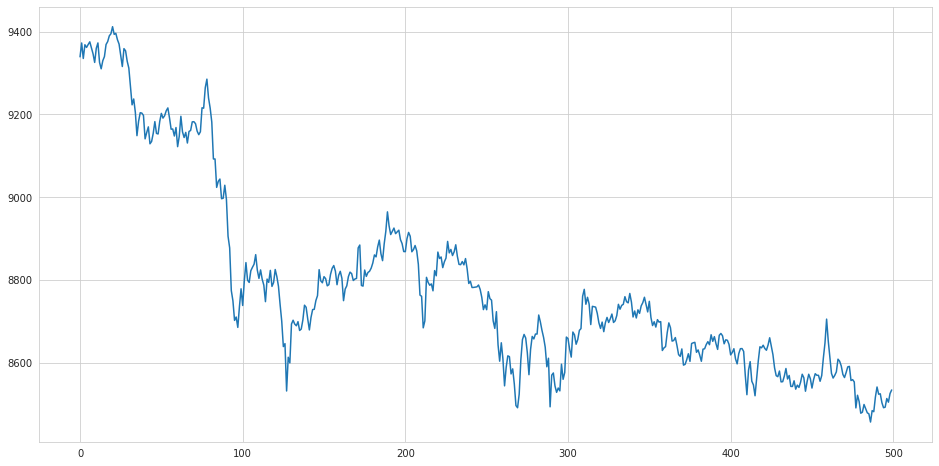

In [17]:
plt.figure(figsize=(16,8))
coins['BTCUSDT Close'].iloc[:500].plot()

In [21]:
SEQUENCE_LEN = 240
FUTURE_PERIOD_PREDICT = 15
RATIO_TO_PREDICT = 'BTCUSDT'

In [60]:
def classify(current_price, future_price):
    if future_price > (current_price + current_price*0.0125):
        return 1
    return 0

In [34]:
coins['Future Value'] = coins['BTCUSDT Close'].shift(-FUTURE_PERIOD_PREDICT)

In [61]:
coins['Target'] = list(map(classify, coins['BTCUSDT Close'], coins['Future Value']))

In [62]:
coins['Target'].unique()

array([0, 1])